# Case 16 - Tree-based methods

## Business Problem

You are an analyst at a Colombian EPS. This company has identified a lot of problems arising from people developing heart deseases. So, the company has decided to build a model capable of classifying the risk that a patient has of developing these deseases.

### Packages Import

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  RocCurveDisplay

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### Data Import

The information was downloaded from a dataset available [online](https://biolincc.nhlbi.nih.gov/studies/framcohort/).

In [2]:
df_heart_disease = pd.read_csv(r'./data/framingham.csv')
df_heart_disease.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### EDA and Data Cleaning

In [3]:
print(df_heart_disease.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [4]:
#Droping education column
df_heart_disease.drop(columns='education',inplace=True)

#Droping the observations that have at least one missing value
df_heart_disease.dropna(axis=0,inplace=True)

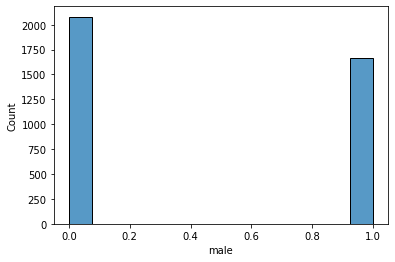

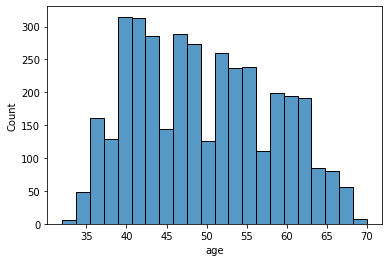

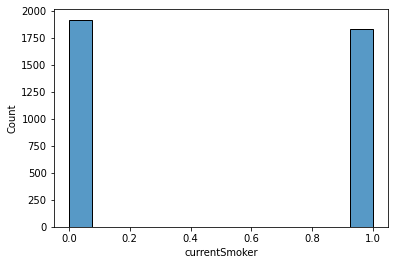

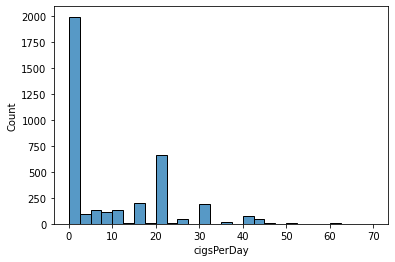

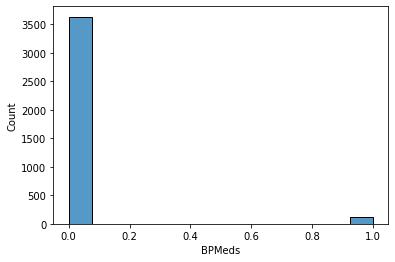

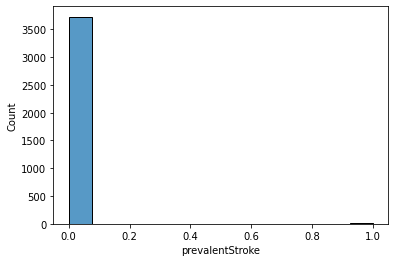

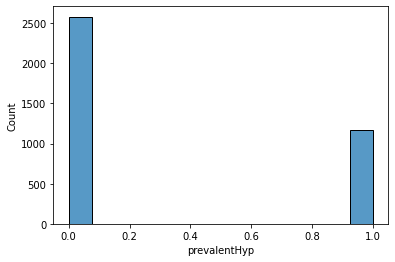

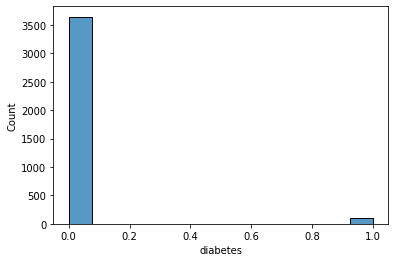

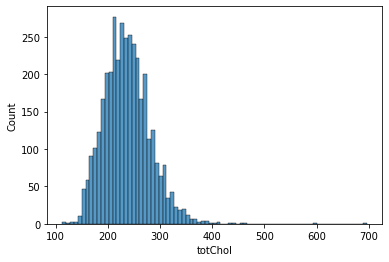

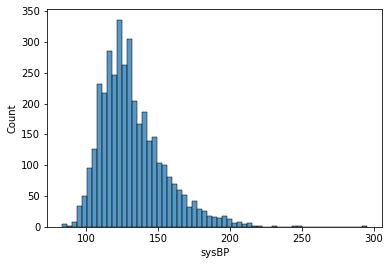

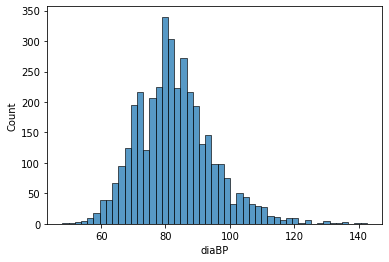

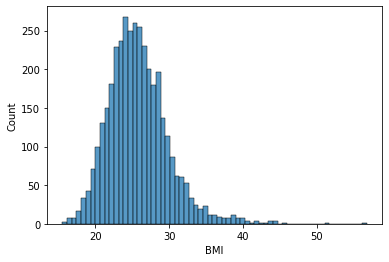

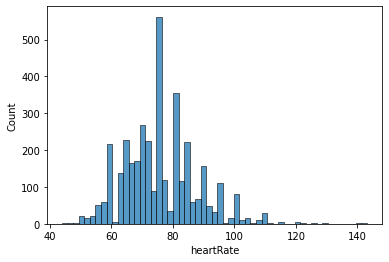

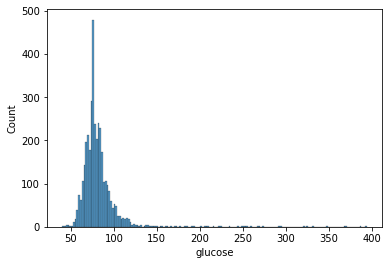

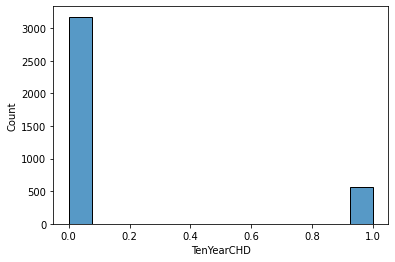

In [5]:
for column in df_heart_disease.columns:
    sns.histplot(x= column,data = df_heart_disease)
    plt.show()

### Train - Test Split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df_heart_disease.drop(columns='TenYearCHD'), df_heart_disease['TenYearCHD'] , test_size=0.5, random_state=0)

## Introduction

In this module, we will talk about methods based on stratifying or segmenting the predictor space into different spaces based on simple splitting rules. As those splitting rules used to segment the input space can be summarized into a tree, these methods are called decision tree methods.  

## Basics

Tree methods can be used for regression and classification problems. However, we will be only talking about classification problems. A classsification tree uses segmentation of the input variable space to classify an observation as the class with the most observations present in the segment. An example  of a tree for a classification problem can be seen on the following image. It consists on a series of splitting decisions that start at the top of the tree. The first splitting decision corresponds to splitting Thal. The text Thal:a indicates that the left-hand branch coming out of that node consists of observations with the first value of the Thal variable (normal), and the right-hand node consists of the remaining observations (fixed or reversible defects). The text ChestPain:bc two splits down the tree on the left indicates that the left-hand branch coming out of that node consists of observations with the second and third values of the ChestPain variable, where the possible values are typical angina, atypical angina, non-anginal pain, and asymptomatic. The nodes in which splits are made are called internal nodes and nodes that are at the bottom of the tree are called terminal nodes or leaves. The segments of the trees that connect nodes are called branches. 

<figure>
<img src="/work/indu5012_case_16/fig/Class_Tree.PNG" align="center"/> 
<figcaption align = "center"><b>Fig. 8.1 - Classification tree for a classification problem </b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure>


Terminal nodes are the final division of the input-variables' space with which the final classification is made. An example of how a classification tree divides the input space can be seen on the following image.

<figure>
<img src="/work/indu5012_case_16/fig/Class_Tree_Seg.PNG" align="center"/> 
<figcaption align = "center"><b>Fig. 8.2 - Input space segmentation by a classification tree when there are two input variables. </b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure>


## Classification Trees

### Tree-growing

For a classification tree, we predict that each observation belongs to the most commonly occurring class of training observations in the region to which it belongs. In interpreting the results of a classification tree, we are often interested not only in the class prediction corresponding to a particular terminal node region, but also in the class proportions among the training observations that fall into that region.

In order to grow a tree, its partitions have to be determined. when constructing the tree, the goal is to find boxes $R_1,...,R_J$ that minimize the prediction error rate. However, as all of the possible partitions cannot be made in order to determine the best one, a top-down greedy approach is used to construct the tree. In each step of this **recursive binary splitting process**, the best possible split is made by obtaining the predictor $X_j$ for which segmenting the input space into $\{X|X_j < s\}$ and $\{X|X_j > s\}$ make the biggest reduction in the prediction error rate. However, it turns out that prediction error rate is not a sensitive enough metric in order to grow the tree properly and two other metrics are preferred for this purpose, the **Gini index** and the **entropy**. The Gini index and entropy are metrics that prioritize node purity, i.e. having terminal nodes with observations that belong mostly to only one class. Both of these metrics are defined as: <center> $\text{Gini}=\sum_{k=1}^{K}\hat p_{mk}(1-\hat p_{mk})$ </center> <center> $\text{Entropy}=-\sum_{k=1}^{K}\hat p_{mk}\log(\hat p_{mk})$ </center> 

where $\hat p_{mk}$ represents the proportion of training observations in the $m^{th}$ region that are from the $k^{th}$ class. Hence, if we define the two half-spaces in which the input space is going to be separated as $R_1=\{X|X_j < s\}$ and $R_2=\{X|X_j > s\}$, then the values for $j$ and $s$ are searched in order to reduce one of the following expressions: <center> $\sum_{i=1}^{K}\hat p_{R_1k}(1-\hat p_{R_1k})+\sum_{i=1}^{K}\hat p_{R_2k}(1-\hat p_{R_2k})$ </center> <center> $-\sum_{i=1}^{K}\hat p_{R_1k}\log(\hat p_{R_1k})-\sum_{i=1}^{K}\hat p_{R_2k}\log(\hat p_{R_2k})$ </center>

This process is repeated until a condition is met, such as there being no nodes with more than five observations in them. 

### Tree-pruning

The process described above may produce good predictions on the training set, but is likely to overfit the data, leading to poor test set performance. This is because the resulting tree might be too complex. A smaller tree with fewer splits (i.e., fewer regions $R_1,...,R_J$ ) might lead to lower variance and better interpretation at the cost of a little bias. One possible alternative to the process described above is to build the tree only so long as the decrease in the Gini index or entropy due to each split exceeds some (high) threshold. This strategy will result in smaller trees, but is too short-sighted, since a split that may seem worthless early on in the tree might be followed by a very good split that leads to a large improvement later on.

Therefore, a better strategy is to grow a very big tree $T_0$ and then prune it to get a smaller subtree. In order to do this, a regularization parameter $\alpha$ is used to generate subtrees that are smaller. For each value of $\alpha$, there is a subtree $T \subseteq T_0$, such that one of the following expressions is minimal: <center> $\sum_{m=1}^{|T|}\sum_{i=1}^{K}\hat p_{mk}(1-\hat p_{mk})+\alpha|T|$ </center> <center> $-\sum_{m=1}^{|T|}\sum_{i=1}^{K}\hat p_{mk}\log(\hat p_{mk})+\alpha|T|$ </center>

where $|T|$ is the number of terminal nodes that the tree has. As different values of $\alpha$ yield different subtrees, using k-fold cross-validation, one can test different values of $\alpha$ to determine the one that results on the best classification tree.

### Classification tree example

In [7]:
#Importing data
import pandas as pd

df_heart_disease = pd.read_csv(r'./data/framingham.csv')

#Importing libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier

#Droping education column
df_heart_disease.drop(columns='education',inplace=True)

#Droping the observations that have at least one missing value
df_heart_disease.dropna(axis=0,inplace=True)

#Definition of input variables
X = df_heart_disease.drop(columns='TenYearCHD')
#Definition of output variable
y = df_heart_disease['TenYearCHD']

#Defining model
dtc = DecisionTreeClassifier()

#Fitting model
dtc_res = dtc.fit(X_train, Y_train)

#### Obtaining metrics for decision trees

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtc, X, y, cv=10, scoring='accuracy')
print(scores)
print("Accuracy: ",scores.mean())

scores = cross_val_score(dtc, X, y, cv=10, scoring='recall')
print("Recall: ",scores.mean())

scores = cross_val_score(dtc, X, y, cv=10, scoring='roc_auc')
print("Roc_auc: ",scores.mean())

[0.752      0.80266667 0.75733333 0.768      0.75733333 0.74133333
 0.78666667 0.74666667 0.73333333 0.76470588]
Accuracy:  0.7610039215686275
Recall:  0.26938898971566844
Roc_auc:  0.552265059410624


### Decision Trees Grid Search

In [9]:
#Importing libraries
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(3, 15), 'ccp_alpha':np.linspace(0,10,50)}

dtc = DecisionTreeClassifier()

grid = GridSearchCV(dtc, param_grid, scoring='roc_auc', cv=10)

grid.fit(X, y)

# Best estimators
print("Best DTC parameters: ",grid.best_estimator_)
print('Best DTC ROC_AUC score: %.3f' % np.abs(grid.best_score_))

Best DTC parameters:  DecisionTreeClassifier(criterion='entropy', max_depth=5)
Best DTC ROC_AUC score: 0.703


### Decision tree model Testing

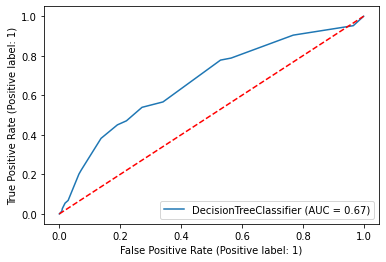

In [10]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtc_res = dtc.fit(X_train, Y_train)

RocCurveDisplay.from_estimator(dtc_res, X_test, Y_test)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")

### Decision tree model Comparision

In [12]:
qda = QuadraticDiscriminantAnalysis(reg_param = 0.22)
qda_res = qda.fit(X_train, Y_train)

lda = LinearDiscriminantAnalysis(solver='lsqr')
lda.fit(X_train,Y_train)

LinearDiscriminantAnalysis(solver='lsqr')

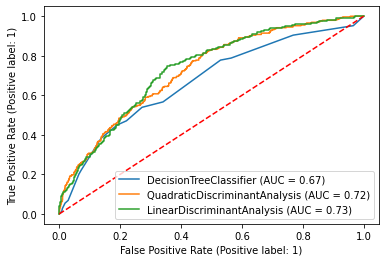

In [13]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(dtc_res, X_test, Y_test, ax = ax)
RocCurveDisplay.from_estimator(qda, X_test, Y_test, ax=ax)
RocCurveDisplay.from_estimator(lda, X_test, Y_test,ax=ax)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=96262903-a28f-4719-a328-dc59e3cfa77f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>